# Random Walk

In [1]:
# Python libraries needed for this notebook

import random
import matplotlib.pyplot as plt

In [2]:
# Set Matplotlib parameters for styling

plt.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['xtick.major.size'] = 7
plt.rcParams['ytick.major.size'] = 7
plt.rcParams['legend.numpoints'] = 1

In [5]:
class Location(object):                            # Immutable type
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def move(self, deltaX, deltaY):
        return Location(self.x + deltaX, self.y + deltaY)

    def getX(self):
        return self.x

    def getY(self):
        return self.y

    # Euclidean Distance
    def distFrom(self, other):
        xDist = self.x - other.getX()
        yDist = self.y - other.getY()
        return (xDist**2 + yDist**2)**0.5

    def __str__(self):
        return f'<{self.x}, {self.y}>'

In [6]:
class Field(object):
    def __init__(self):
        self.drunks = {}
        
    def addDrunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError('Duplicate drunk')
        self.drunks[drunk] = loc
            
    def moveDrunk(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        xDist, yDist = drunk.takeStep()
        self.drunks[drunk] = self.drunks[drunk].move(xDist, yDist)
        
    def getLoc(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        return self.drunks[drunk]


In [7]:
# Not intended to be useful on its own.
# Base class to be inherited.


class Drunk(object):
    def __init__(self, name=None):
        self.name = name

    def __str__(self):
        return self.name if self.name else 'Anonymous'

In [8]:
class UsualDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        return random.choice(stepChoices)

In [9]:
class MasochistDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0.0, 1.1), (0.0, -0.9), (1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices)

In [10]:
# Functions to perform simulations and plotting
def walk(f, d, numSteps):
    start = f.getLoc(d)
    for _ in range(numSteps):
        f.moveDrunk(d)
    return start.distFrom(f.getLoc(d))

def simWalks(numSteps, numTrials, dClass):
    Homer = dClass('Homer')
    origin = Location(0, 0)
    distances = []
    for _ in range(numTrials):
        f = Field()
        f.addDrunk(Homer, origin)
        distances.append(round(walk(f, Homer, numSteps), 1))
    return distances

def simDrunk(numTrials, dClass, walkLengths):
    meanDistances = []
    for numSteps in walkLengths:
        print(f'Starting simulation of {numSteps} steps')
        trials = simWalks(numSteps, numTrials, dClass)
        mean = sum(trials) / len(trials)
        meanDistances.append(mean)
    return meanDistances

def simAll(drunkKinds, walkLengths, numTrials):
    styles = ['m-', 'b--', 'g-.']
    for dClass, style in zip(drunkKinds, styles):
        print(f'Starting simulation of {dClass.__name__}')
        means = simDrunk(numTrials, dClass, walkLengths)
        plt.plot(walkLengths, means, style, label=dClass.__name__)
    plt.title(f'Mean Distance from Origin ({numTrials} trials)')
    plt.xlabel('Number of Steps')
    plt.ylabel('Distance from Origin')
    plt.legend(loc='best')
    plt.show()

def plotLocs(drunkKinds, numSteps, numTrials):
    styles = ['k+', 'r^', 'mo']
    for dClass, style in zip(drunkKinds, styles):
        locs = getFinalLocs(numSteps, numTrials, dClass)
        xVals, yVals = zip(*[(loc.getX(), loc.getY()) for loc in locs])
        plt.plot(xVals, yVals, style, label=f'{dClass.__name__}')
    plt.title(f'Location at End of Walks ({numSteps} steps)')
    plt.ylim(-1000, 1000)
    plt.xlim(-1000, 1000)
    plt.xlabel('Steps East/West of Origin')
    plt.ylabel('Steps North/South of Origin')
    plt.legend(loc='lower center')
    plt.show()

def getFinalLocs(numSteps, numTrials, dClass):
    locs = []
    d = dClass()
    for _ in range(numTrials):
        f = Field()
        f.addDrunk(d, Location(0, 0))
        for _ in range(numSteps):
            f.moveDrunk(d)
        locs.append(f.getLoc(d))
    return locs

Starting simulation of UsualDrunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of MasochistDrunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps


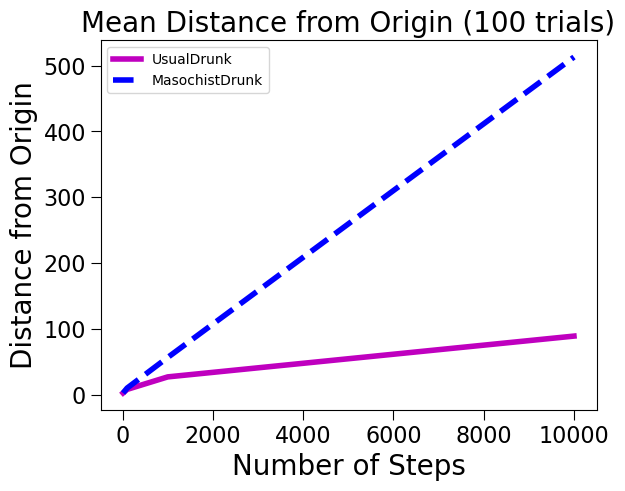

In [11]:
# Example usage:
random.seed(0)
numSteps = (10, 100, 1000, 10000)
simAll((UsualDrunk, MasochistDrunk), numSteps, 100)

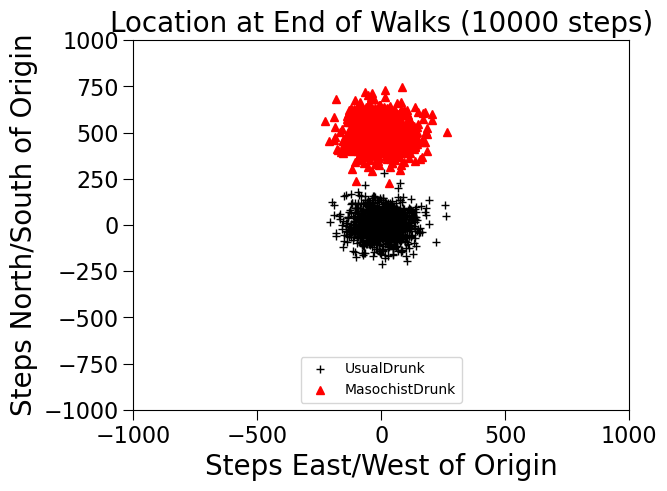

In [29]:





random.seed(0)
plotLocs((UsualDrunk, MasochistDrunk), 10000, 1000)

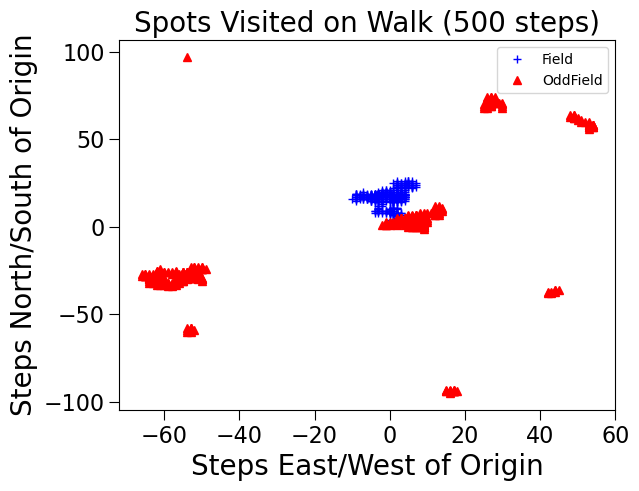

In [26]:
class OddField(Field):
    def __init__(self, numHoles = 1000,
                 xRange = 100, yRange = 100):
        Field.__init__(self)
        self.wormholes = {}
        for w in range(numHoles):
            x = random.randint(-xRange, xRange)
            y = random.randint(-yRange, yRange)
            newX = random.randint(-xRange, xRange)
            newY = random.randint(-yRange, yRange)
            newLoc = Location(newX, newY)
            self.wormholes[(x, y)] = newLoc

    def moveDrunk(self, drunk):
        Field.moveDrunk(self, drunk)
        x = self.drunks[drunk].getX()
        y = self.drunks[drunk].getY()
        if (x, y) in self.wormholes:
            self.drunks[drunk] = self.wormholes[(x, y)]



class styleIterator(object):
    def __init__(self, styles):
        self.index = 0
        self.styles = styles

    def nextStyle(self):
        result = self.styles[self.index]
        if self.index == len(self.styles) - 1:
            self.index = 0
        else:
            self.index += 1
        return result


def traceWalk(fieldKinds, numSteps):
    styleChoice = styleIterator(['b+', 'r^', 'ko'])
    for fClass in fieldKinds:
        d = UsualDrunk()
        f = fClass()
        f.addDrunk(d, Location(0, 0))
        locs = []
        for s in range(numSteps):
            f.moveDrunk(d)
            locs.append(f.getLoc(d))
        xVals, yVals = [], []
        for loc in locs:
            xVals.append(loc.getX())
            yVals.append(loc.getY())
        curStyle = styleChoice.nextStyle()
        plt.plot(xVals, yVals, curStyle, label=fClass.__name__)
    plt.title(f'Spots Visited on Walk ({numSteps} steps)')
    plt.xlabel('Steps East/West of Origin')
    plt.ylabel('Steps North/South of Origin')
    plt.legend(loc='best')
    plt.show()

random.seed(123)
traceWalk((Field, OddField), 500)